# Shadowing Trajectories: Common or Rare?

Here we compute shadowing trajectories for some simple 1D maps, namely:

1. Sawtooth
1. Cusp
1. Logistic

and plot their probability distributions. In case of the Logistic map, we don't expect the distribution to have a pdf. Our objective is to determine whether the shadowing trajectories for these maps can be considered typical, with 
respect to the SRB measure ( _ which exists in all three cases, since all 3 are Axiom-A systems_ ) of the corresponding systems. 
    
    
**Definition 1**(Continuous Type): A continuous type of a trajectory ${\chi} := \left\{ x_i \right\}_{i=0}^{\infty}$, denoted by $\nu_{\chi}$, is a probability measure such that, $\nu_{\chi} (A) 
= \lim_{N \to \infty} \frac{1}{N} \sum_{i=1}^{N} I_A(x_i), \;\; \forall \;\; A \in \mathbb{B}(\mathbb{\lambda})$,
where $\mathbb{\lambda}$ is the attractor.
    
**Definition 2**($\epsilon$-typicality): A trajectory ${\chi} := \left\{ x_i \right\}_{i=0}^{\infty}$ is considered to be $\epsilon$-typical with respect to a probability measure $\mu$ if 
${\rm sup}_{A \in \mathbb{B}(\mathbb{\lambda})} |\mu(A) - \nu_{\chi}(A)| < \epsilon$ where $\mu$ is the SRB measure on the attractor
$\mathbb{\lambda}$ and $\nu_\chi$ is the continuous type of the trajectory $\chi$.

### The Cusp Map

The cusp map is given by:

$$F_s(x) = 1 - s|2x-1| - (1-s)\sqrt{|2x-1|} $$


#### SRB pdf of the Cusp Map

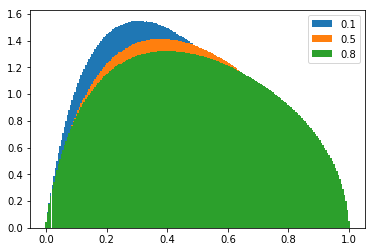

In [31]:
from pylab import *
from numpy import *
n_sample = 10000
n_mc_iter = 10000
n_bins = 200
eps = 1.e-6
x = random.rand(n_sample)
x_trajectory = [x]
s_values = [0.1,0.5,0.8]
for s in s_values:
    for i in range(n_mc_iter):
        x = 1 - s*abs(2*x-1) - (1-s)*sqrt(abs(2*x-1)) + eps*sin(2*pi*x)
        x_trajectory.append(x)
    traj, _ = histogram(ravel(x_trajectory), linspace(0,1,n_bins+1), normed=True)
    bar(linspace(0,1,n_bins),traj,width=1/n_bins)
legend([s_values[0],s_values[1],s_values[2]])
show()

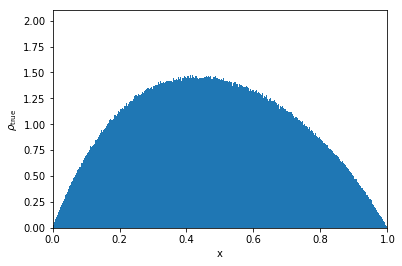

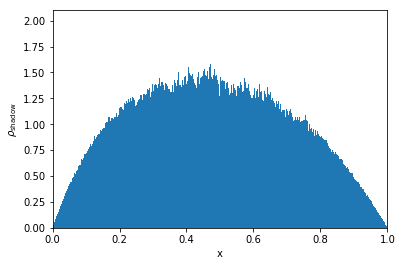

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#matplotlib.use('Agg')
from pylab import *
from numpy import *
from IPython import display
import time
m = -0.005
s = 0.3
n = 100000
x = zeros([n, 100])
x[0,:] = rand(100)
plt.figure()
plt.ion()
for i in range(1,n):
    pL = x[i-1,:]
    pM = 0.5 - x[i-1,:]
    pR = x[i-1,:] - 1
    p = 4 * m * minimum(pL, maximum(pM, pR))
    x[i,:] = 1 - s*abs(2.0*x[i-1,:]-1.0) - (1-s)*sqrt(abs(2.0*x[i-1,:]-1.0)) + p
 #   plt.plot(i,x[i,1],'b*-',i,(2.0*x[i-1,1])%1,'ro')
 #   display.clear_output(wait=True)
  #  plt.xlim([0,n])
  #  plt.ylim([0,1])
   # display.display(plt.gcf())
   # time.sleep(1.0)
y = copy(x)    
maxres = -10.e0
for i in range(n-1,0,-1):
    residual = x[i,:] - (1 - s*abs(2.0*x[i-1,:]-1.0) - (1-s)*sqrt(abs(2.0*x[i-1,:]-1.0)))
    #Minimum image convention
    residual[residual>0.5] -= 1
    if(max(residual)>maxres):
        maxres = max(residual)
    x[i-1,:] += residual / 2
    x[i-1,x[i-1,:] < 0] += 1
    x[i-1,x[i-1,:] > 1] -= 1

N = 1024
h, _ = histogram(ravel(y), linspace(0,1,N+1), normed=True)

figure()
bar(linspace(0,1,N+1)[:-1], h, 1./N)
xlabel('x')
ylabel(r'$\rho_{\rm true}$')
xlim([0,1])
ylim([0.0,2.1])
show()

h, _ = histogram(ravel(x), linspace(0,1,N+1), normed=True)

figure()
bar(linspace(0,1,N+1)[:-1], h, 1./N)
xlabel('x')
ylabel(r'$\rho_{\rm shadow}$')
xlim([0,1])
ylim([0.0,2.1])
show()


In [9]:
max(abs(ravel(x)-ravel(y)))q

0.003448012442840126